## Project 1: Trading with Momentum

## Import py from another folder

In [2]:
import sys
sys.path.append("./Project1")
import helper

import pandas as pd
import numpy as np
import project_helper2
#import project_tests

## Load Market Data
## RMB to add parse_dates=['date']

In [3]:
df = pd.read_csv('./Project1/eod-quotemedia.csv', parse_dates=['date'])
df.head()

,date,ticker,adj_close
0,2013-07-01,A,29.994186
1,2013-07-02,A,29.650137
2,2013-07-03,A,29.705185
3,2013-07-05,A,30.434568
4,2013-07-08,A,30.524021


In [4]:
df2 = pd.read_csv('./Project1/eod-quotemedia.csv')
df2.head()

,date,ticker,adj_close
0,2013-07-01,A,29.994186
1,2013-07-02,A,29.650137
2,2013-07-03,A,29.705185
3,2013-07-05,A,30.434568
4,2013-07-08,A,30.524021


### Create pivote df to better analyze data

In [5]:
close = df.pivot(index='date', columns='ticker', values='adj_close')
close.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-01,29.994186,16.176093,81.138217,53.109173,34.924478,50.863198,31.425388,64.694095,46.235,39.913360,...,27.668791,35.288928,76.320802,40.023873,22.106665,25.753386,45.480383,71.898827,27.858587,29.447893
2013-07-02,29.650137,15.819834,80.722073,54.312247,35.428076,50.696766,31.272881,64.712041,46.030,39.860576,...,27.542284,35.059033,76.608168,39.965530,22.082740,25.613675,45.402661,72.934172,28.038932,28.572441
2013-07-03,29.705185,16.127950,81.237299,54.612043,35.444862,50.937167,30.725650,65.214519,46.420,40.186077,...,27.334452,35.280086,76.650427,40.004426,22.202365,25.734758,46.063299,72.301458,28.181310,28.168387
2013-07-05,30.434568,16.214608,81.821882,54.173381,35.856134,51.371737,31.326707,66.075911,47.000,40.652334,...,27.695899,35.801771,77.394196,40.675380,22.585164,26.060750,46.413048,73.164246,29.396267,29.024598
2013-07-08,30.524021,16.310894,82.951417,53.865799,36.661889,52.037461,31.766285,66.820655,46.625,40.256455,...,27.985057,35.200507,77.968926,40.646208,22.489464,26.228403,46.950626,73.892823,29.576612,29.765365


### Here is the difference, the index is DatetimeIndex

In [6]:
close.index

DatetimeIndex(['2013-07-01', '2013-07-02', '2013-07-03', '2013-07-05',
               '2013-07-08', '2013-07-09', '2013-07-10', '2013-07-11',
               '2013-07-12', '2013-07-15',
               ...
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', name='date', length=1009, freq=None)

In [7]:
close2 = df2.pivot(index='date', columns='ticker', values='adj_close')
close2.index

Index(['2013-07-01', '2013-07-02', '2013-07-03', '2013-07-05', '2013-07-08',
       '2013-07-09', '2013-07-10', '2013-07-11', '2013-07-12', '2013-07-15',
       ...
       '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22', '2017-06-23',
       '2017-06-26', '2017-06-27', '2017-06-28', '2017-06-29', '2017-06-30'],
      dtype='object', name='date', length=1009)

### Stock Example
Let's see what a single stock looks like from the closing prices. For this example and future display examples in this project, we'll use Apple's stock (AAPL). If we tried to graph all the stocks, it would be too much information.

In [8]:
apple_ticker = 'AAPL'
project_helper2.plot_stock(close[apple_ticker], '{} Stock'.format(apple_ticker))

In [37]:
close['AAPL'].head()

date
2013-07-01    53.109173
2013-07-02    54.312247
2013-07-03    54.612043
2013-07-05    54.173381
2013-07-08    53.865799
Name: AAPL, dtype: float64

## Resample Adjusted Prices

The trading signal you'll develop in this project does not need to be based on daily prices, for instance, you can use month-end prices to perform trading once a month. To do this, you **must first resample** the daily adjusted closing prices into monthly buckets, and select the last observation of each month.

Implement the `resample_prices` to resample `close_prices` at the sampling frequency of `freq`.

In [10]:
def resample_prices(close_prices, freq='M'):  
    return close_prices.resample(freq).last()

In [11]:
monthly_close = resample_prices(close)

monthly_close.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,30.778617,18.631393,81.732709,58.730009,38.521450,53.877450,32.990815,66.228449,47.28,43.441078,...,28.328432,41.283890,79.236714,41.696397,23.207213,23.219961,47.447784,80.028191,28.133851,28.740319
2013-08-31,32.092884,15.559861,79.334925,63.649943,36.090567,53.017321,30.018669,64.828687,45.75,41.013736,...,26.710955,38.600581,74.178477,40.830963,23.877112,23.188665,45.560804,75.819706,26.584661,28.104002
2013-09-30,35.346979,18.255876,81.982130,62.282664,37.886202,56.910722,29.892578,66.075911,51.94,41.696116,...,27.977014,41.650756,73.225288,42.277383,24.755162,26.136377,46.452239,78.936357,26.061902,30.003311
2013-10-31,35.009028,21.154093,98.342860,68.285838,41.396376,60.850696,33.055761,66.822997,54.22,43.690086,...,27.750075,40.386592,76.272087,45.870693,23.913149,32.417109,44.244047,84.058477,26.988611,30.585820
2013-11-30,36.947077,22.608016,100.157413,73.070375,41.396376,65.917191,34.538974,70.432348,56.78,42.732980,...,29.039087,39.716074,80.102213,46.313771,27.377429,32.473487,50.826346,87.844811,27.916745,30.093124


- dk why got error
- if without error should be like
- 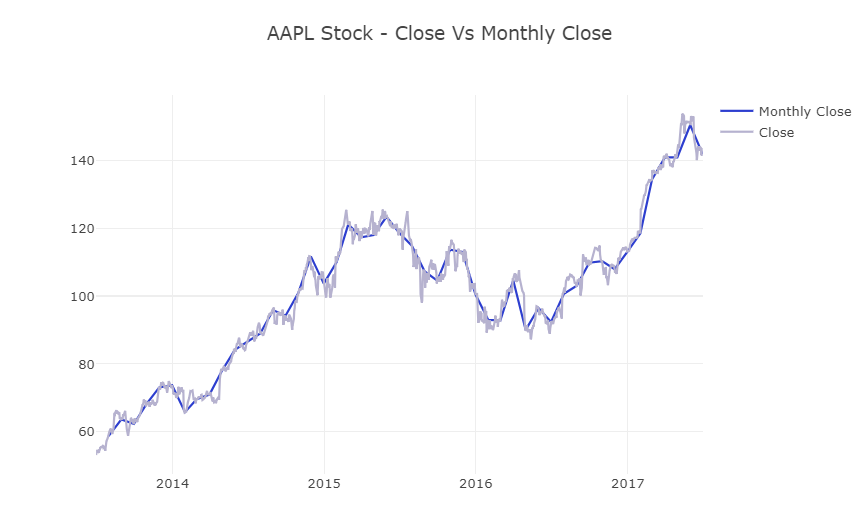

In [38]:
monthly_close.loc[:, "AAPL"]


date
2013-07-31     58.730009
2013-08-31     63.649943
2013-09-30     62.282664
2013-10-31     68.285838
2013-11-30     73.070375
2013-12-31     73.720829
2014-01-31     65.781340
2014-02-28     69.562086
2014-03-31     70.950049
2014-04-30     78.002226
2014-05-31     84.142556
2014-06-30     86.470101
2014-07-31     88.954500
2014-08-31     95.849308
2014-09-30     94.212856
2014-10-31    100.992441
2014-11-30    111.694117
2014-12-31    103.664312
2015-01-31    110.031807
2015-02-28    121.117057
2015-03-31    117.317417
2015-04-30    117.996261
2015-05-31    123.342948
2015-06-30    118.746464
2015-07-31    114.841109
2015-08-31    107.238017
2015-09-30    104.565626
2015-10-31    113.647952
2015-11-30    112.990537
2015-12-31    100.535790
2016-01-31     92.971250
2016-02-29     92.847547
2016-03-31    104.658746
2016-04-30     90.014780
2016-05-31     96.477781
2016-06-30     92.362066
2016-07-31    100.680449
2016-08-31    103.058326
2016-09-30    109.809083
2016-10-31    110.28

## Compute Log Returns

Compute log returns ($R_t$) from prices ($P_t$) as your primary momentum indicator:

$$R_t = log_e(P_t) - log_e(P_{t-1})$$

In [14]:
def compute_log_returns(prices):    
    return np.log(prices)-np.log(prices.shift(1))


In [39]:
monthly_close_returns = compute_log_returns(monthly_close)
monthly_close_returns


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31,0.041814,-0.180153,-0.029776,0.080448,-0.065184,-0.016093,-0.094410,-0.021362,-0.032896,-0.057498,...,-0.058792,-0.067205,-0.065966,-0.020974,0.028457,-0.001349,-0.040582,-0.054021,-0.056639,-0.022389
2013-09-30,0.096579,0.159792,0.032823,-0.021715,0.048555,0.070865,-0.004209,0.019056,0.126897,0.016501,...,0.046309,0.076052,-0.012933,0.034812,0.036114,0.119665,0.019377,0.040284,-0.019860,0.065396
2013-10-31,-0.009607,0.147346,0.181959,0.092019,0.088606,0.066939,0.100586,0.011243,0.042961,0.046713,...,-0.008145,-0.030822,0.040766,0.081574,-0.034606,0.215358,-0.048704,0.062871,0.034940,0.019229
2013-11-30,0.053881,0.066471,0.018283,0.067721,0.000000,0.079976,0.043893,0.052605,0.046134,-0.022150,...,0.045404,-0.016742,0.048996,0.009613,0.135290,0.001738,0.138694,0.044059,0.033812,-0.016240
2013-12-31,0.067696,0.072677,0.091973,0.008862,0.086168,-0.003124,0.003659,0.059508,0.053142,0.061626,...,-0.000050,0.032986,0.079351,0.020441,0.071819,0.001157,-0.027009,0.021431,0.021252,0.048255
2014-01-31,0.016647,0.284211,0.036635,-0.113949,-0.062202,-0.044943,-0.038937,-0.028873,-0.011573,-0.053642,...,-0.102433,0.010830,-0.093573,-0.049471,-0.114809,-0.036496,-0.113616,0.008335,-0.041225,-0.071656
2014-02-28,-0.021203,0.095987,0.103739,0.055883,0.033556,0.012784,0.081678,0.042523,0.147977,0.058731,...,0.056153,0.122868,0.050622,-0.016609,0.012821,0.168497,0.098217,-0.001384,0.083073,0.021506
2014-03-31,-0.017900,-0.008976,-0.006294,0.019756,0.009579,-0.033876,-0.032446,-0.044528,-0.043022,0.044640,...,0.032843,0.038889,0.014540,0.015895,0.033529,-0.077378,0.017529,0.010228,-0.007076,-0.069407


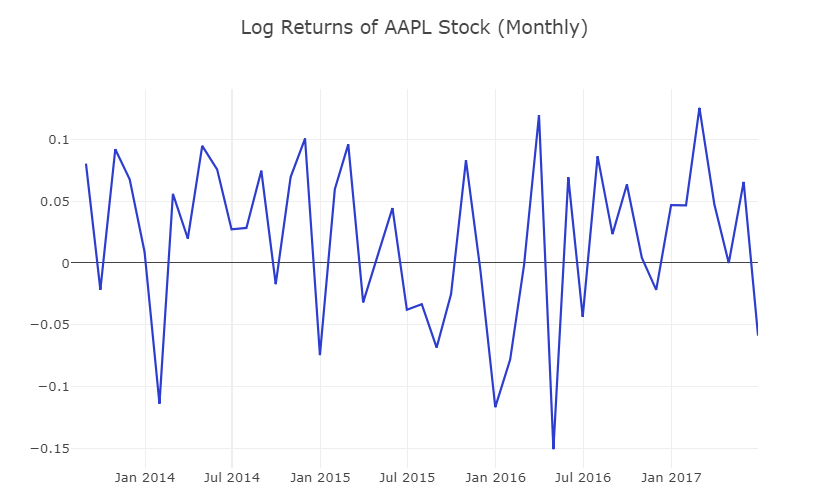

In [18]:
monthly_close_returns.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-08-31,0.041814,-0.180153,-0.029776,0.080448,-0.065184,-0.016093,-0.094410,-0.021362,-0.032896,-0.057498,...,-0.058792,-0.067205,-0.065966,-0.020974,0.028457,-0.001349,-0.040582,-0.054021,-0.056639,-0.022389
2013-09-30,0.096579,0.159792,0.032823,-0.021715,0.048555,0.070865,-0.004209,0.019056,0.126897,0.016501,...,0.046309,0.076052,-0.012933,0.034812,0.036114,0.119665,0.019377,0.040284,-0.019860,0.065396
2013-10-31,-0.009607,0.147346,0.181959,0.092019,0.088606,0.066939,0.100586,0.011243,0.042961,0.046713,...,-0.008145,-0.030822,0.040766,0.081574,-0.034606,0.215358,-0.048704,0.062871,0.034940,0.019229
2013-11-30,0.053881,0.066471,0.018283,0.067721,0.000000,0.079976,0.043893,0.052605,0.046134,-0.022150,...,0.045404,-0.016742,0.048996,0.009613,0.135290,0.001738,0.138694,0.044059,0.033812,-0.016240


## Shift Returns
Implement the `shift_returns` function to shift the log returns to the previous or future returns in the time series. For example, the parameter `shift_n` is 2 and `returns` is the following:

```
                           Returns
               A         B         C         D
2013-07-08     0.015     0.082     0.096     0.020     ...
2013-07-09     0.037     0.095     0.027     0.063     ...
2013-07-10     0.094     0.001     0.093     0.019     ...
2013-07-11     0.092     0.057     0.069     0.087     ...
...            ...       ...       ...       ...
```

the output of the `shift_returns` function would be:
```
                        Shift Returns
               A         B         C         D
2013-07-08     NaN       NaN       NaN       NaN       ...
2013-07-09     NaN       NaN       NaN       NaN       ...
2013-07-10     0.015     0.082     0.096     0.020     ...
2013-07-11     0.037     0.095     0.027     0.063     ...
...            ...       ...       ...       ...
```
Using the same `returns` data as above, the `shift_returns` function should generate the following with `shift_n` as -2:
```
                        Shift Returns
               A         B         C         D
2013-07-08     0.094     0.001     0.093     0.019     ...
2013-07-09     0.092     0.057     0.069     0.087     ...
...            ...       ...       ...       ...       ...
...            ...       ...       ...       ...       ...
...            NaN       NaN       NaN       NaN       ...
...            NaN       NaN       NaN       NaN       ...
```
_Note: The "..." represents data points we're not showing._

In [19]:
def shift_returns(returns_df, shift_n):    
    return returns_df.shift(shift_n)
prev_returns = shift_returns(monthly_close_returns, 1)

### View Data
Let's get the previous month's and next month's returns.

In [20]:
prev_returns = shift_returns(monthly_close_returns, 1)

lookahead_returns = shift_returns(monthly_close_returns, -1)


- if not error
- 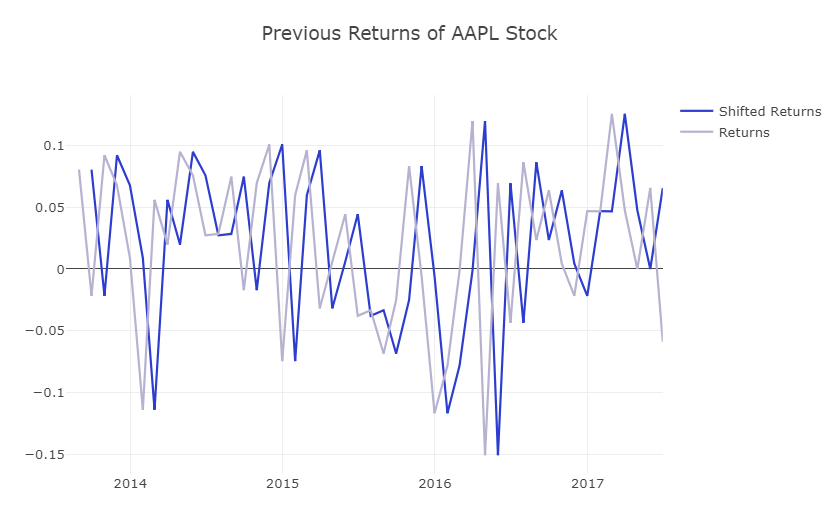

- 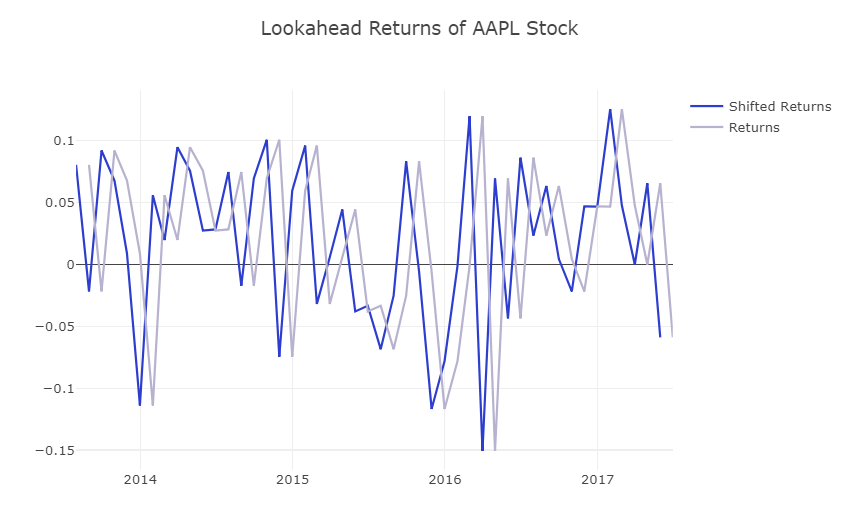

## Generate Trading Signal

A trading signal is a sequence of trading actions, or results that can be used to take trading actions. A common form is to produce a "long" and "short" portfolio of stocks on each date (e.g. end of each month, or whatever frequency you desire to trade at). This signal can be interpreted as rebalancing your portfolio on each of those dates, entering long ("buy") and short ("sell") positions as indicated.

Here's a strategy that we will try:
> For each month-end observation period, **rank the stocks by _previous_ returns, from the highest to the lowest. Select the top performing stocks for the long portfolio, and the bottom performing stocks for the short portfolio.**

Implement the `get_top_n` function to get the top performing stock for each month. Get the top performing stocks from `prev_returns` by assigning them a value of 1. For all other stocks, give them a value of 0. For example, using the following `prev_returns`:

```
                                     Previous Returns
               A         B         C         D         E         F         G
2013-07-08     0.015     0.082     0.096     0.020     0.075     0.043     0.074
2013-07-09     0.037     0.095     0.027     0.063     0.024     0.086     0.025
...            ...       ...       ...       ...       ...       ...       ...
```

The function `get_top_n` with `top_n` set to 3 should return the following:
```
                                     Previous Returns
               A         B         C         D         E         F         G
2013-07-08     0         1         1         0         1         0         0
2013-07-09     0         1         0         1         0         1         0
...            ...       ...       ...       ...       ...       ...       ...
```


In [22]:
def get_top_n(prev_returns, top_n):

    prev_returns2=prev_returns.copy()
    
    for i, row in prev_returns.iterrows():

        
        top=row.nlargest(top_n)
        if top.any():            

            threshold=top[top_n-1] 

            
            signal=(row>=threshold)

            
            prev_returns2.loc[i]=signal

            
    prev_returns2=prev_returns2.fillna(0)
    return prev_returns2.astype(np.int64)

### View Data
We want to get the best performing and worst performing stocks. To get the best performing stocks, we'll use the `get_top_n` function. To get the worst performing stocks, we'll also use the `get_top_n` function. However, we pass in `-1*prev_returns` instead of just `prev_returns`. Multiplying by negative one will flip all the positive returns to negative and negative returns to positive. Thus, it will return the worst performing stocks.

In [23]:
top_bottom_n = 50
df_long = get_top_n(prev_returns, top_bottom_n)


df_short = get_top_n(-1*prev_returns, top_bottom_n)

project_helper2.print_top(df_long, 'Longed Stocks')
project_helper2.print_top(df_short, 'Shorted Stocks')

10 Most Longed Stocks:
INCY, AMD, AVGO, NFX, SWKS, NFLX, ILMN, UAL, NVDA, MU
10 Most Shorted Stocks:
RRC, FCX, CHK, MRO, GPS, WYNN, DVN, FTI, SPLS, TRIP


In [24]:
df_long.head()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2013-11-30,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [40]:
df_short.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-08-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-09-30,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2013-10-31,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2013-11-30,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,0


In [25]:
lookahead_returns.head()

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0.041814,-0.180153,-0.029776,0.080448,-0.065184,-0.016093,-0.094410,-0.021362,-0.032896,-0.057498,...,-0.058792,-0.067205,-0.065966,-0.020974,0.028457,-0.001349,-0.040582,-0.054021,-0.056639,-0.022389
2013-08-31,0.096579,0.159792,0.032823,-0.021715,0.048555,0.070865,-0.004209,0.019056,0.126897,0.016501,...,0.046309,0.076052,-0.012933,0.034812,0.036114,0.119665,0.019377,0.040284,-0.019860,0.065396
2013-09-30,-0.009607,0.147346,0.181959,0.092019,0.088606,0.066939,0.100586,0.011243,0.042961,0.046713,...,-0.008145,-0.030822,0.040766,0.081574,-0.034606,0.215358,-0.048704,0.062871,0.034940,0.019229
2013-10-31,0.053881,0.066471,0.018283,0.067721,0.000000,0.079976,0.043893,0.052605,0.046134,-0.022150,...,0.045404,-0.016742,0.048996,0.009613,0.135290,0.001738,0.138694,0.044059,0.033812,-0.016240
2013-11-30,0.067696,0.072677,0.091973,0.008862,0.086168,-0.003124,0.003659,0.059508,0.053142,0.061626,...,-0.000050,0.032986,0.079351,0.020441,0.071819,0.001157,-0.027009,0.021431,0.021252,0.048255


## Projected Returns
It's now time to check if your trading signal has the potential to become profitable!

We'll start by computing the net returns this portfolio would return. For simplicity, we'll assume every stock gets an equal dollar amount of investment. This makes it easier to compute a portfolio's returns as the simple arithmetic average of the individual stock returns.

Implement the `portfolio_returns` function to compute the expected portfolio returns. Using `df_long` to indicate which stocks to long and `df_short` to indicate which stocks to short, calculate the returns using `lookahead_returns`. To help with calculation, we've provided you with `n_stocks` as the number of stocks we're investing in a single period.

In [26]:
def portfolio_returns(df_long, df_short, lookahead_returns, n_stocks):
    return lookahead_returns*(df_long-df_short)/n_stocks


In [41]:
expected_portfolio_returns = portfolio_returns(df_long, df_short, lookahead_returns, 2*top_bottom_n)
expected_portfolio_returns


"project_helper.plot_returns(expected_portfolio_returns.T.sum(), 'Portfolio Returns')"

In [42]:
expected_portfolio_returns

ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0.000000,-0.000000,-0.000000,0.000000e+00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2013-08-31,0.000000,0.000000,0.000000,-0.000000e+00,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,0.000000
2013-09-30,-0.000096,-0.001473,0.000000,9.201927e-04,0.000000,0.000000,-0.001006,0.000000,0.000000,0.000000,...,-0.000000,-0.000000,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
2013-10-31,0.000000,0.000665,0.000000,-6.772063e-04,0.000000,0.000000,0.000000,0.000000,0.000461,-0.000000,...,0.000000,-0.000000,-0.000490,0.000000,0.000000,0.000017,0.000000,0.000000,-0.000338,-0.000000
2013-11-30,0.000000,0.000727,0.000920,0.000000e+00,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.000000,-0.000330,0.000000,0.000000,-0.000718,0.000012,0.000270,0.000000,0.000000,0.000000
2013-12-31,0.000000,0.000000,0.000000,-0.000000e+00,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,0.000000,-0.000000,-0.000000,-0.001148,-0.000000,-0.001136,0.000000,-0.000000,-0.000000
2014-01-31,-0.000000,0.000000,0.001037,0.000000e+00,0.000336,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000982,-0.000000,0.000000,0.000000
2014-02-28,-0.000000,-0.000090,-0.000000,-1.975642e-04,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,...,-0.000328,0.000000,0.000000,0.000000,-0.000335,-0.000000,-0.000175,0.000000,-0.000000,-0.000000
2014-03-31,0.000318,-0.000000,-0.000000,0.000000e+00,0.000000,-0.000000,0.000000,0.000000,-0.000636,-0.000000,...,0.000000,-0.001398,0.000000,0.000311,0.000000,0.000316,0.000000,0.000000,-0.000000,0.000000


- if not error
- 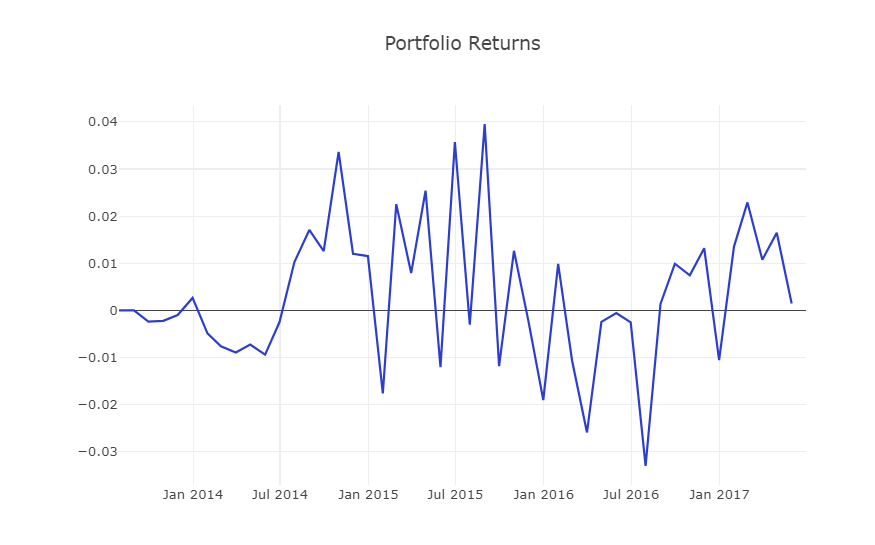

## Statistical Tests
### Annualized Rate of Return

In [28]:
expected_portfolio_returns.head()


ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2013-07-31,0.000000,-0.000000,-0.00000,0.000000,-0.0,-0.0,-0.000000,-0.0,-0.000000,-0.0,...,-0.0,-0.00000,-0.00000,-0.0,0.000000,-0.000000,-0.00000,-0.0,-0.000000,-0.0
2013-08-31,0.000000,0.000000,0.00000,-0.000000,0.0,0.0,-0.000000,0.0,0.000000,0.0,...,0.0,0.00000,-0.00000,0.0,0.000000,0.000000,0.00000,0.0,-0.000000,0.0
2013-09-30,-0.000096,-0.001473,0.00000,0.000920,0.0,0.0,-0.001006,0.0,0.000000,0.0,...,-0.0,-0.00000,0.00000,0.0,-0.000000,0.000000,-0.00000,0.0,0.000000,0.0
2013-10-31,0.000000,0.000665,0.00000,-0.000677,0.0,0.0,0.000000,0.0,0.000461,-0.0,...,0.0,-0.00000,-0.00049,0.0,0.000000,0.000017,0.00000,0.0,-0.000338,-0.0
2013-11-30,0.000000,0.000727,0.00092,0.000000,0.0,-0.0,0.000000,0.0,0.000000,0.0,...,-0.0,-0.00033,0.00000,0.0,-0.000718,0.000012,0.00027,0.0,0.000000,0.0


In [29]:
expected_portfolio_returns.head().T

date,2013-07-31 00:00:00,2013-08-31 00:00:00,2013-09-30 00:00:00,2013-10-31 00:00:00,2013-11-30 00:00:00
ticker,,,,,
A,0.0,0.0,-0.000096,0.000000,0.000000
AAL,-0.0,0.0,-0.001473,0.000665,0.000727
AAP,-0.0,0.0,0.000000,0.000000,0.000920
AAPL,0.0,-0.0,0.000920,-0.000677,0.000000
ABBV,-0.0,0.0,0.000000,0.000000,0.000000
ABC,-0.0,0.0,0.000000,0.000000,-0.000000
ABT,-0.0,-0.0,-0.001006,0.000000,0.000000
ACN,-0.0,0.0,0.000000,0.000000,0.000000
ADBE,-0.0,0.0,0.000000,0.000461,0.000000


In [30]:
expected_portfolio_returns.head().T.sum()


date
2013-07-31    0.000000
2013-08-31    0.000000
2013-09-30   -0.002365
2013-10-31   -0.002227
2013-11-30   -0.000968
Freq: M, dtype: float64

In [31]:
expected_portfolio_returns.T.sum().dropna()


date
2013-07-31    0.000000
2013-08-31    0.000000
2013-09-30   -0.002365
2013-10-31   -0.002227
2013-11-30   -0.000968
2013-12-31    0.002644
2014-01-31   -0.004870
2014-02-28   -0.007614
2014-03-31   -0.008930
2014-04-30   -0.007255
2014-05-31   -0.009385
2014-06-30   -0.002472
2014-07-31    0.010266
2014-08-31    0.017064
2014-09-30    0.012594
2014-10-31    0.033622
2014-11-30    0.012018
2014-12-31    0.011523
2015-01-31   -0.017597
2015-02-28    0.022545
2015-03-31    0.007921
2015-04-30    0.025397
2015-05-31   -0.012030
2015-06-30    0.035726
2015-07-31   -0.003049
2015-08-31    0.039523
2015-09-30   -0.011829
2015-10-31    0.012646
2015-11-30   -0.002222
2015-12-31   -0.019011
2016-01-31    0.009875
2016-02-29   -0.010679
2016-03-31   -0.025892
2016-04-30   -0.002426
2016-05-31   -0.000565
2016-06-30   -0.002552
2016-07-31   -0.033000
2016-08-31    0.001369
2016-09-30    0.009896
2016-10-31    0.007438
2016-11-30    0.013181
2016-12-31   -0.010546
2017-01-31    0.013531
2017-0

In [32]:
expected_portfolio_returns_by_date = expected_portfolio_returns.T.sum().dropna()
portfolio_ret_mean = expected_portfolio_returns_by_date.mean()
portfolio_ret_ste = expected_portfolio_returns_by_date.sem()
portfolio_ret_annual_rate = (np.exp(portfolio_ret_mean * 12) - 1) * 100

print("""
Mean:                       {:.6f}
Standard Error:             {:.6f}
Annualized Rate of Return:  {:.2f}%
""".format(portfolio_ret_mean, portfolio_ret_ste, portfolio_ret_annual_rate))


Mean:                       0.003185
Standard Error:             0.002158
Annualized Rate of Return:  3.90%



The annualized rate of return allows you to compare the rate of return from this strategy to other quoted rates of return, which are usually quoted on an annual basis. 

### T-Test
Our null hypothesis ($H_0$) is that the actual mean return from the signal is zero. We'll perform a one-sample, one-sided t-test on the observed mean return, to see if we can reject $H_0$.

We'll need to first compute the t-statistic, and then find its corresponding p-value. The p-value will indicate the probability of observing a t-statistic equally or more extreme than the one we observed if the null hypothesis were true. A small p-value means that the chance of observing the t-statistic we observed under the null hypothesis is small, and thus casts doubt on the null hypothesis. It's good practice to set a desired level of significance or alpha ($\alpha$) _before_ computing the p-value, and then reject the null hypothesis if $p < \alpha$.

For this project, we'll use $\alpha = 0.05$, since it's a common value to use.

Implement the `analyze_alpha` function to perform a t-test on the sample of portfolio returns. We've imported the `scipy.stats` module for you to perform the t-test.

Note: [`scipy.stats.ttest_1samp`](https://docs.scipy.org/doc/scipy-1.0.0/reference/generated/scipy.stats.ttest_1samp.html) performs a two-sided test, so divide the p-value by 2 to get 1-sided p-value

In [33]:
from scipy import stats
import scipy
def analyze_alpha(expected_portfolio_returns_by_date):
    t_stat, p= scipy.stats.ttest_1samp(expected_portfolio_returns_by_date,0)

    return t_stat, p/2


In [34]:
t_value, p_value = analyze_alpha(expected_portfolio_returns_by_date)
print("""
Alpha analysis:
 t-value:        {:.3f}
 p-value:        {:.6f}
""".format(t_value, p_value))


Alpha analysis:
 t-value:        1.476
 p-value:        0.073339



### Question: What p-value did you observe? And what does that indicate about your signal?


The p-value observed is 0.073359, which is larger than 𝛼=0.05<br/>
Therefore I will say the return is not significant enough to conclude our portfolio model works.
It is possible that the earning/return is by chance only.